In [1]:
import sys
if not '..' in sys.path:
    sys.path.append('..')

In [2]:
from analysis import files, analysis, subject
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

### Visualize trajectories from a given trial

created emg_olympics for morio
{'trial_0': {'outcome': 'Miss', 'target': [0.5, 0.87], 'hold_time': 0.7666667, 'reach_time': None}, 'trial_1': {'outcome': 'Miss', 'target': [-0.5, 0.87], 'hold_time': 0.7833334, 'reach_time': None}, 'trial_2': {'outcome': 'Hit', 'target': [1.0, 0.0], 'hold_time': 2.083333, 'reach_time': 1.233333}, 'trial_3': {'outcome': 'Hit', 'target': [0.0, -1.0], 'hold_time': 0.7666667, 'reach_time': 4.033333}, 'trial_4': {'outcome': 'Hit', 'target': [-0.87, 0.5], 'hold_time': 0.7833334, 'reach_time': 4.233333}, 'trial_5': {'outcome': 'Miss', 'target': [0.5, -0.87], 'hold_time': 0.7833334, 'reach_time': None}, 'trial_6': {'outcome': 'Miss', 'target': [0.87, -0.5], 'hold_time': 1.3, 'reach_time': None}, 'trial_7': {'outcome': 'Miss', 'target': [0.0, 1.0], 'hold_time': 1.733333, 'reach_time': None}, 'trial_8': {'outcome': 'Hit', 'target': [-0.87, -0.5], 'hold_time': 0.7833334, 'reach_time': 3.083333}, 'trial_9': {'outcome': 'Hit', 'target': [-1.0, 0.0], 'hold_time': 0.7

/Users/spencer/phd/phd/analysis/notebooks/../analysis/analysis.py:93: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(np.cos(theta), np.sin(theta), style, marker=m, markersize=markersize, color="grey")
/Users/spencer/phd/phd/analysis/notebooks/../analysis/analysis.py:93: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(np.cos(theta), np.sin(theta), style, marker=m, markersize=markersize, color="grey")


{'trial_0': {'outcome': 'Hit', 'target': [0.0, 1.0], 'hold_time': 0.7833334, 'reach_time': 1.4}, 'trial_1': {'outcome': 'Hit', 'target': [-0.5, 0.87], 'hold_time': 0.7833334, 'reach_time': 0.6833333}, 'trial_2': {'outcome': 'Hit', 'target': [1.0, 0.0], 'hold_time': 0.7666667, 'reach_time': 1.65}, 'trial_3': {'outcome': 'Hit', 'target': [-0.5, -0.87], 'hold_time': 0.7833334, 'reach_time': 1.9}, 'trial_4': {'outcome': 'Hit', 'target': [-0.87, 0.5], 'hold_time': 0.7666667, 'reach_time': 1.316667}, 'trial_5': {'outcome': 'Hit', 'target': [0.5, -0.87], 'hold_time': 0.7833334, 'reach_time': 1.516667}, 'trial_6': {'outcome': 'Hit', 'target': [0.87, -0.5], 'hold_time': 0.7666667, 'reach_time': 0.6833333}, 'trial_7': {'outcome': 'Hit', 'target': [0.5, 0.87], 'hold_time': 0.7666667, 'reach_time': 2.666667}, 'trial_8': {'outcome': 'Hit', 'target': [0.87, 0.5], 'hold_time': 0.7833334, 'reach_time': 1.816667}, 'trial_9': {'outcome': 'Hit', 'target': [-0.87, -0.5], 'hold_time': 0.7833334, 'reach_tim

Text(0.5, 0, 'Worst Performer')

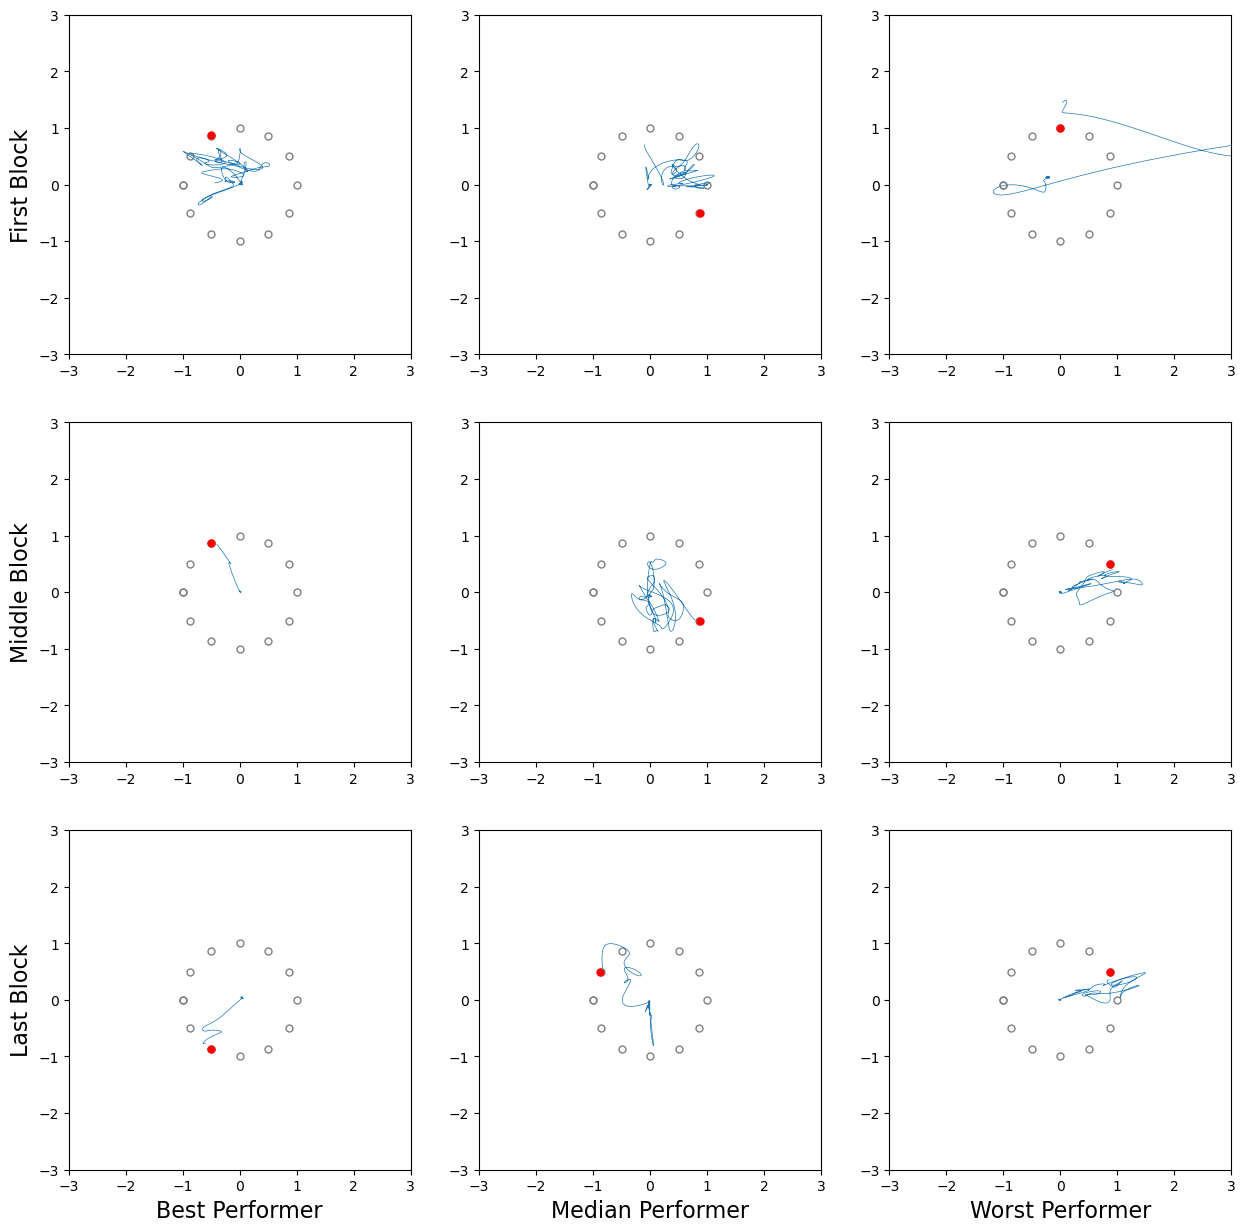

In [3]:
collection_name = "emg_olympics"
subject_name = "alba"
task_name = "center_hold"
session_num = "1"
trial_num = "1"

subjects = ["morio", "holly", "hyewon"]

behavior_fig, axes = plt.subplots(3,3, figsize=(15,15))
for ax in axes.flatten():
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])

sessions = [0,22,44]
for col, subject_name in enumerate(subjects):
    for row in range(3):
        s = subject.Subject(subject_name)
        t = s.get_center_hold_trajectory(collection_name, subject_name, sessions[row], trial_num)
        b = s.get_session_outcomes(collection_name, sessions[row])
        analysis.plot_targets(axes[row,col], target=b[f"trial_{trial_num}"]["target"])
        axes[row,col].plot(t[:,-2],t[:,-1], linewidth=0.5)

axes[0,0].set_ylabel("First Block", fontsize=16)
axes[1,0].set_ylabel("Middle Block", fontsize=16)
axes[2,0].set_ylabel("Last Block", fontsize=16)
axes[2,0].set_xlabel("Best Performer", fontsize=16)
axes[2,1].set_xlabel("Median Performer", fontsize=16)
axes[2,2].set_xlabel("Worst Performer", fontsize=16)

In [6]:
behavior_fig.savefig("/Users/spencer/motor-control/thesis/images/data_analysis2023/behavior.pdf", dpi=300, format="pdf")